# 스타벅스 이디야 데이터 분석 

## 스타벅스 이디야 데이터 분석
### 과연 이디야 커피는 스타벅스 커피 매장 근처에 매장을 가지고 있는가? 

### 스타벅스 
- https://www.starbucks.co.kr/index.do

스타벅스 홈페이지에는 매장의 위치를 찾을 수 있는 메뉴.

![Screen Shot 2022-01-31 at 3 38 48 PM](https://user-images.githubusercontent.com/60166685/151749571-2afe3a4b-a15d-4849-a457-34ade3399200.png)

여기서 매장찾기 지역검색으로 들어가면 아래의 그림의 화면.

![Screen Shot 2022-01-31 at 3 38 56 PM](https://user-images.githubusercontent.com/60166685/151749575-035bb411-45f4-4974-8420-476863b3ef14.png)

서울시로 한정. 서울시에서 강남구를 찾으면 화면이 나타남.


![Screen Shot 2022-01-31 at 3 39 08 PM](https://user-images.githubusercontent.com/60166685/151749581-937398c5-c6af-45ff-9c74-028734cca568.png)

--- 
### 이디야
- https://www.ediya.com/

이디야 커피 홈페이지에서도 매장찾기 메뉴.

![Screen Shot 2022-01-31 at 3 44 41 PM](https://user-images.githubusercontent.com/60166685/151750152-ae319a09-0770-4e09-832a-571ea888352b.png)

but, 이디야 커피 홈페이지에서는 주소찾기가 스타벅스와는 조금 다르다.

주소입력란에 직접 입력해야함.

![Screen Shot 2022-01-31 at 3 45 01 PM](https://user-images.githubusercontent.com/60166685/151750162-9cb3e3d1-2d99-4c68-8305-0227b546d608.png)


서울시의 각 구 이름을 아래 그림의 위치에 각각 입력해서 나타난 결과를 수집해야 함. 

![Screen Shot 2022-01-31 at 3 45 16 PM](https://user-images.githubusercontent.com/60166685/151750167-fc0cb199-d1b0-48de-96bb-250fe220c334.png)

In [ ]:
# 참고자료
# http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015
# https://www.youtube.com/watch?v=PR1WeCdFWvg
# 구별 스타벅스 이디야 점포 수 그래프 
# 스타벅스: 강남구 서대문구 서초구 영등포구 종로구 중구, 나머지 19개 구에서는 이디야가 더 많음 
# 강서구 스타벅스 매장 12개, 이디야 40개(2017 기준)
# 도봉구 스타벅스 매장 1개, 이디야 18개(2017 기준) 

# 1. 데이터 정리

In [1]:
import pandas as pd

In [3]:
stb_df = pd.read_csv('../data/starbucks.csv', encoding='utf-8', index_col=0)
stb_df.tail()

title                                      address        lat  \
565   사가정역                            서울특별시 중랑구 면목로 310  37.579594   
566    상봉역                      서울특별시 중랑구 망우로 307 (상봉동)  37.596890   
567  묵동이마트  서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)  37.613433   
568     묵동        서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층  37.615368   
569    중화역                       서울특별시 중랑구 봉화산로 35 1,2층  37.601709   

            lng   gu  
565  127.087966  중랑구  
566  127.086470  중랑구  
567  127.077484  중랑구  
568  127.076633  중랑구  
569  127.078411  중랑구

In [4]:
edi_df = pd.read_csv('../data/ediya.csv', encoding='utf-8', index_col=0)
edi_df.tail()

title                      address   gu        lat         lng
717  중랑교차로점         서울 중랑구 동일로 683 (면목동)  중랑구  37.591397  127.079841
718    중랑역점         서울 중랑구 망우로 198 (상봉동)  중랑구  37.593212  127.074866
719    중화동점       서울 중랑구 동일로129길 1 (중화동)  중랑구  37.599505  127.080383
720    중화역점           서울 중랑구 동일로 815, 1층  중랑구  37.603092  127.078876
721   화랑대역점  서울 중랑구 신내로25가길 2 (묵동, 현동학당)  중랑구  37.619451  127.084160

In [5]:
stb_df['brand'] = '스타벅스'
edi_df['brand'] = '이디야'

In [8]:
cafe_df = pd.concat([stb_df, edi_df], axis=0)
cafe_df.tail()

title                      address        lat         lng   gu brand
717  중랑교차로점         서울 중랑구 동일로 683 (면목동)  37.591397  127.079841  중랑구   이디야
718    중랑역점         서울 중랑구 망우로 198 (상봉동)  37.593212  127.074866  중랑구   이디야
719    중화동점       서울 중랑구 동일로129길 1 (중화동)  37.599505  127.080383  중랑구   이디야
720    중화역점           서울 중랑구 동일로 815, 1층  37.603092  127.078876  중랑구   이디야
721   화랑대역점  서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160  중랑구   이디야

In [63]:
# 위도 경도 데이터가 object 타입이면 float 으로 변형
# cafe_df = cafe_df[['lat', 'lng']].astype('float')
# cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 721
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     1292 non-null   float64
 1   lng     1292 non-null   float64
dtypes: float64(2)
memory usage: 30.3 KB


In [10]:
cafe_df.reset_index(inplace=True)
del cafe_df['index']
cafe_df.tail()

title                      address        lat         lng   gu brand
1287  중랑교차로점         서울 중랑구 동일로 683 (면목동)  37.591397  127.079841  중랑구   이디야
1288    중랑역점         서울 중랑구 망우로 198 (상봉동)  37.593212  127.074866  중랑구   이디야
1289    중화동점       서울 중랑구 동일로129길 1 (중화동)  37.599505  127.080383  중랑구   이디야
1290    중화역점           서울 중랑구 동일로 815, 1층  37.603092  127.078876  중랑구   이디야
1291   화랑대역점  서울 중랑구 신내로25가길 2 (묵동, 현동학당)  37.619451  127.084160  중랑구   이디야

# 2. 데이터 분석 및 시각화

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

%matplotlib inline
# get_ipython().run_inline_magic("matplotlib", "inline")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system()  == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

In [11]:
# 스타벅스 매장 주요 분포 지역
# 강남구 중구 서초구 영등포구 종로구
cafe_df['gu'][cafe_df['brand'] == '스타벅스'].value_counts(ascending=False)[:5]

강남구     88
중구      53
서초구     48
영등포구    40
종로구     39
Name: gu, dtype: int64

In [12]:
# 이디야 매장 주요 분포 지역
# 강남구 강서구 영등포구 송파구 마포구 
cafe_df['gu'][cafe_df['brand'] == '이디야'].value_counts(ascending=False)[:5]

강남구     46
강서구     45
영등포구    41
송파구     40
마포구     39
Name: gu, dtype: int64

In [149]:
# 구별 매장 수
df1 = cafe_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
df1.head()

gu brand  shop_count
0  강남구  스타벅스          88
1  강남구   이디야          46
2  강동구  스타벅스          16
3  강동구   이디야          25
4  강북구  스타벅스           6

In [158]:
# 구별 각 브랜드 매장 수
df1.pivot_table(index='gu', columns='brand', aggfunc=np.sum)

shop_count    
brand       스타벅스 이디야
gu                  
강남구           88  46
강동구           16  25
강북구            6  20
강서구           22  45
관악구           11  28
광진구           18  24
구로구           12  28
금천구           11  24
노원구           13  31
도봉구            3  24
동대문구           9  24
동작구           11  23
마포구           33  39
서대문구          21  21
서초구           48  30
성동구           12  23
성북구           14  32
송파구           34  40
양천구           17  26
영등포구          40  41
용산구           23  14
은평구            8  27
종로구           39  31
중구            53  30
중랑구            8  26

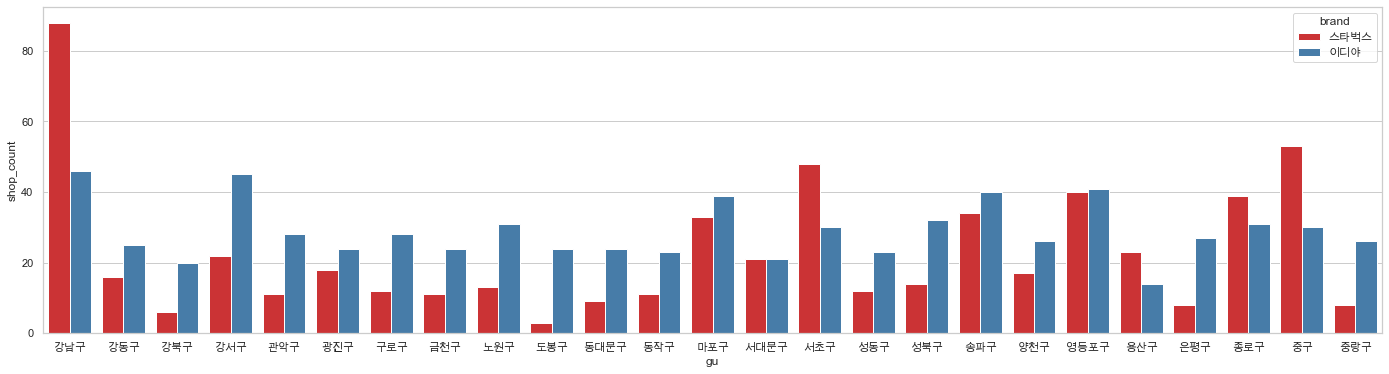

In [185]:
# 구 별 매장 수 차이 1 
plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', palette='Set1')
plt.show()

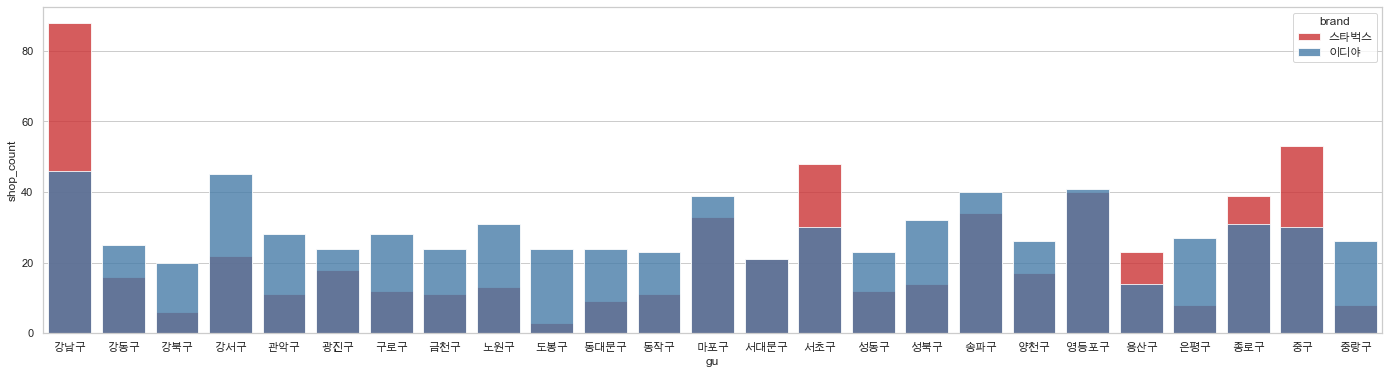

In [191]:
# 구 별 매장 수 차이 2 
# 강남구 중구 서초구 종로구 용산구에서 스타벅스 매장이 더 많다 
# 서대문구 영등포구는 비슷한 매장 수를 가지고 있다
# 그 외 20개 구에서는 이디야 매장이 더 많은 것을 알 수 있다
plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', dodge=False, alpha=0.8, palette='Set1')
plt.show()

- 강남구 중구 서초구 종로구 용산구에서 스타벅스 매장이 더 많다 
- 서대문구 영등포구는 비슷한 매장 수를 가지고 있다
- 그 외 20개 구에서는 이디야 매장이 더 많은 것을 알 수 있다
- 1차 종합 결론
    - 주요 상권 지역에는 일부 스타벅스와 이디야 매장이 밀집되어 있는 것으로 볼 수 있다
    - 스타벅스는 주요 상권에 매장이 집중되어 있는 경향이 매우 뚜렷하다
    - 이디야는 스타벅스보다 훨씬 넓은 지역에 매장이 분포되어 있는 경향으로 볼 수 있다

# 3. 지도 시각화

In [246]:
# 지도 시각화 데이터 프레임(스타벅스)
stb_df_m = stb_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
stb_df_m = stb_df_m.pivot_table(index='gu')
stb_df_m.head()

shop_count
gu             
강남구          88
강동구          16
강북구           6
강서구          22
관악구          11

In [247]:
# 지도 시각화 데이터 프레임(이디야)
edi_df_m = edi_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
edi_df_m = edi_df_m.pivot_table(index='gu')
edi_df_m.head()

shop_count
gu             
강남구          46
강동구          25
강북구          20
강서구          45
관악구          28

In [194]:
import folium
import json

geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

## 3-1. 스타벅스 매장 지도 시각화

In [258]:
sta_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

sta_m.choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
)

for idx, rows in stb_df.iterrows():
    folium.Circle(
        location = [rows["lat"], rows["lng"]],
        radius = 100,
        popup = rows["title"] + "점",
        color = '#2c9147',fill_color = '#2c9147').add_to(sta_m) 

sta_m

## 3-2. 이디야 매장 지도 시각화

In [256]:
edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

edi_m.choropleth(
    geo_data=geo_str,
    data=edi_df_m['shop_count'],
    columns=[edi_df_m.index, edi_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
)

for idx, rows in edi_df.iterrows():
    folium.Circle(
        location = [rows["lat"], rows["lng"]],
        radius = 100,
        popup =  rows["title"] + "점",
        color = '#5882FA',fill_color = '#5882FA').add_to(edi_m) 

edi_m

## 3-3. 스타벅스 + 이디야 매장 지도 시각화(스타벅스 기준)

In [261]:
sta_edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

sta_edi_m.choropleth(
    geo_data=geo_str,
    data=stb_df_m['shop_count'],
    columns=[stb_df_m.index, stb_df_m['shop_count']],
    fill_color='PuRd',
    key_on='feature.id'
)

for idx, rows in stb_df.iterrows():
    folium.Circle(
        location = [rows['lat'], rows['lng']],
        radius = 100,
        popup = '스타벅스' + rows['title'] + '점',
        color = '#2c9147',fill_color = '#2c9147').add_to(sta_edi_m) 

for idx, rows in edi_df.iterrows():
    folium.Circle(
        location = [rows['lat'], rows['lng']],
        radius = 100,
        popup =  '이디야' + rows["title"] + '점',
        color = '#5882FA',fill_color = '#5882FA').add_to(sta_edi_m) 

sta_edi_m

# 4. 분석 결과

- 강남구 중구 서초구 종로구 용산구에서 스타벅스 매장이 더 많다 
- 서대문구 영등포구는 비슷한 매장 수를 가지고 있다
- 그 외 20개 구에서는 이디야 매장이 더 많은 것을 알 수 있다
---
- 주요 상권, 회사 밀집 지역에 스타벅스 매장이 집중되어 있는 것으로 볼 수 있다
- 이디야는 주요 상권에서는 스타벅스와 근접한 것으로 볼 수 있으나, 스타벅스보다 서울시 기준 고르게 분포되어 있다


# 5. 고민해볼 부분

- 위 자료는 창업초~ 현재까지의 이디야가 있는거라고 생각
- 나중에 기회가 된다면 이디야 창업초창기 즉 이디야가 시작했을때의 년도만 찾아서 상권분석을 해보고싶다.